In [ ]:
from plotnine import *
import pandas as pd

time = "2024-01-24_20:40"
time = "2024-01-30_14:24"
time = "2024-01-30_15:31" # classifier
time = "2024-01-31_11:30" # classifier_reg
time = "2024-02-04_19:53" # classifier_reg
time = "2024-02-04_22:36" # classifier_reg

df = pd.read_csv(f"/projects/genomic-ml/da2343/ml_project_1/reproduce/results/{time}_results.csv")
# df has columns: ['Mean Squared Error', 'FoldID', 'Dataset', 'Index of Predicted Column', 'Predicted Column Name', 'Algorithm']
# drop Index of Predicted Column
df = df.drop(columns=['Index of Predicted Column'])

# group df by dataset, algorithm, and predicted column name
# find mean of mean squared error
df = df.groupby(['Dataset', 'Algorithm', 'Predicted Column Name']).mean().reset_index()

# filter where 'Dataset' contains 'log'
log_df = df[df['Dataset'].str.contains('log')]

log_df

In [17]:
from plotnine import *
import pandas as pd

time = "2024-01-24_20:40"
time = "2024-01-30_14:24"
time = "2024-01-30_15:31" # classifier
time = "2024-01-31_11:30" # classifier_reg
time = "2024-02-04_19:53" # classifier_reg
time = "2024-02-04_22:36" # classifier_reg
time = "2024-02-05_10:50" # reg

df = pd.read_csv(f"/projects/genomic-ml/da2343/ml_project_1/reproduce/results/{time}_results.csv")
df = df.drop(columns=['Index of Predicted Column'])
df = df.groupby(['Dataset', 'Algorithm', 'Predicted Column Name']).mean().reset_index()

df = df[(df['Dataset'] == "ioral") | (df['Dataset'] == "crohns")]
df

,Dataset,Algorithm,Predicted Column Name,Mean Squared Error,FoldID
764,crohns,Featureless,f__Bacteroidaceae,1.015490,1.0
765,crohns,Featureless,f__Enterobacteriaceae,1.001791,1.0
766,crohns,Featureless,f__Lachnospiraceae,1.006102,1.0
767,crohns,Featureless,f__Pasteurellaceae,1.020313,1.0
768,crohns,Featureless,f__Ruminococcaceae,1.017312,1.0
...,...,...,...,...,...
1737,ioral,LassoCV,Tannerella,0.673913,1.0
1738,ioral,LassoCV,Treponema,0.520390,1.0
1739,ioral,LassoCV,Tumebacillus,0.979554,1.0
1740,ioral,LassoCV,Veillonella,0.624696,1.0


# REGRESSION

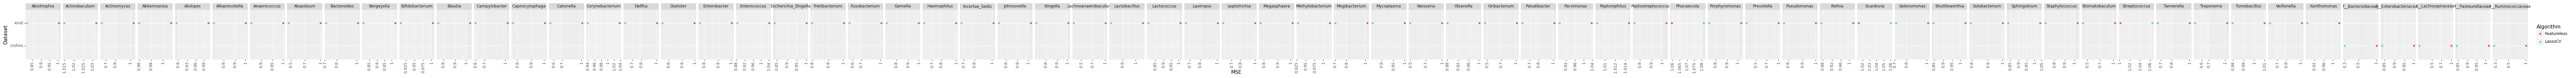

In [18]:

p = ggplot(df)
p = p + geom_point(aes(x="Mean Squared Error", y="Dataset", color="Algorithm"))
p = p + facet_grid("~Predicted Column Name", scales="free")
p = p + labs(
    x="MSE", y="Dataset"
)
p = p + theme(axis_text_x=element_text(angle=90))
p = p + theme(figure_size=(100, 2))
p = p + scale_x_log10()
print(p)

In [ ]:
p.save(filename = "plot.png", dpi=3000)


# CLASSIFICATION

In [ ]:

p = ggplot(log_df)
p = p + geom_point(aes(x="Test Accuracy", y="Dataset", color="Algorithm"))
p = p + facet_grid("~Predicted Column Name", scales="free")
p = p + labs(x="Accuracy", y="Dataset")
p = p + theme(axis_text_x=element_text(angle=90))
p = p + theme(figure_size=(45, 2))
# p = p + scale_x_log10()
print(p)

In [ ]:
p.save(filename = "binary_classification.png", dpi=300)

In [ ]:
from plotnine import *
import pandas as pd
import numpy as np

time = "2024-01-24_20:40"
time = "2024-01-30_14:24"
time = "2024-01-30_15:31" # classifier
time = "2024-01-31_11:30" # classifier_reg
time = "2024-02-02_11:33"

df = pd.read_csv(f"/projects/genomic-ml/da2343/ml_project_1/reproduce/results/{time}_results.csv")
# df has columns: ['Mean Squared Error', 'FoldID', 'Dataset', 'Index of Predicted Column', 'Predicted Column Name', 'Algorithm']
# drop Index of Predicted Column
df = df.drop(columns=['Index of Predicted Column'])

# convert 'FPR' and 'TPR' columns from string to array
df['FPR'] = df['FPR'].apply(lambda x:  np.fromstring(x[1:-1], sep=" ") )
df['TPR'] = df['TPR'].apply(lambda x:  np.fromstring(x[1:-1], sep=" ") )

# group df by dataset, algorithm, and predicted column name
# find mean of mean squared error
df = df.groupby(['Dataset', 'Algorithm', 'Predicted Column Name', 'FoldID']).mean().reset_index()

# filter where 'Dataset' contains 'log'
# log_df = df[df['Dataset'].str.contains('log')]

# log_df
df